In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

In [ ]:
#Load CIFAR10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


In [ ]:
## Data Visualization

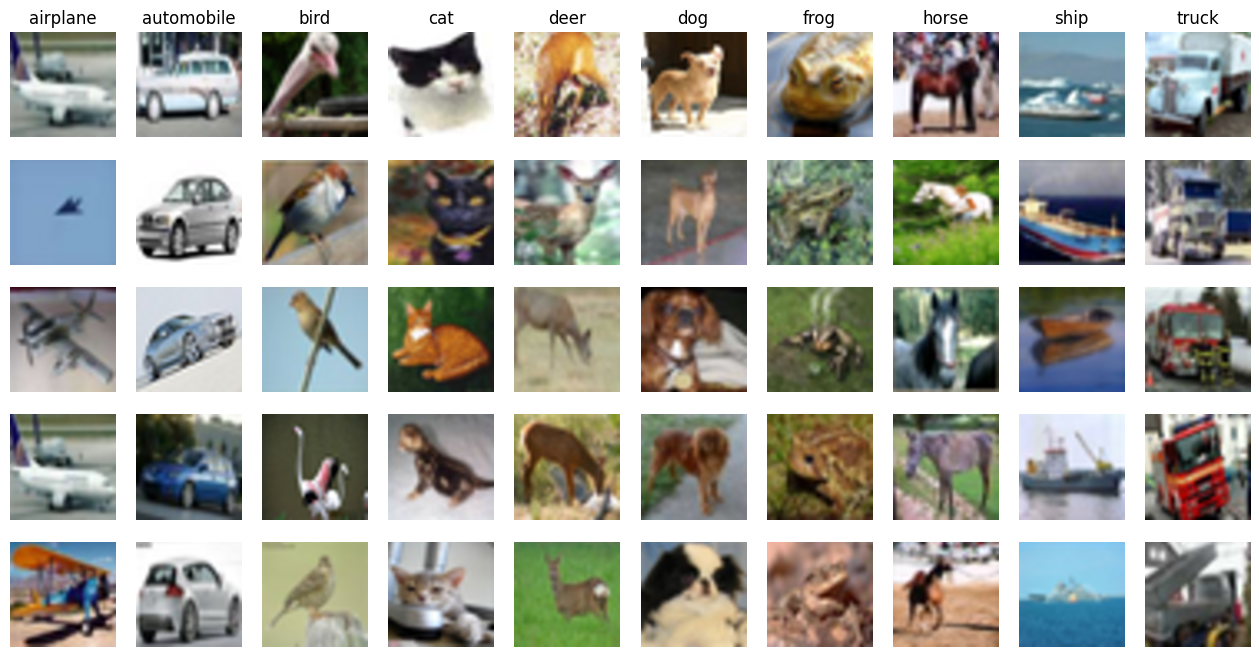

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

In [ ]:
# Data Preprocessing

In [ ]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features])
X_test  =  X_test.reshape([-1, num_features])

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [ ]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

In [ ]:
##One-hot encodding
#We have 10 classes: 0, 1, ..., 9
##In one-hot encoding, we represent labels using vectors.

#0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#.
#.
#.
#9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
#Multi-layer Neural Network

In [ ]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden Layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))

model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))


# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               307300    
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
# Training the model

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 [==============================] - 3s 13ms/step - loss: 1.6996 - accuracy: 0.3960 - val_loss: 1.5786 - val_accuracy: 0.4480
Epoch 2/15
192/192 [==============================] - 3s 14ms/step - loss: 1.4992 - accuracy: 0.4702 - val_loss: 1.5623 - val_accuracy: 0.4570
Epoch 3/15
192/192 [==============================] - 2s 12ms/step - loss: 1.4029 - accuracy: 0.5048 - val_loss: 1.4958 - val_accuracy: 0.4770
Epoch 4/15
192/192 [==============================] - 3s 17ms/step - loss: 1.3337 - accuracy: 0.5292 - val_loss: 1.4477 - val_accuracy: 0.4900
Epoch 5/15
192/192 [==============================] - 2s 11ms/step - loss: 1.2744 - accuracy: 0.5516 - val_loss: 1.4408 - val_accuracy: 0.5120
Epoch 6/15
192/192 [==============================] - 3s 14ms/step - loss: 1.2266 - accuracy: 0.5678 - val_loss: 1.4777 - val_accuracy: 0.4870
Epoch 7/15
192/192 [==============================] - 3s 14ms/step - loss: 1.1827 - accuracy: 0.5839 - val_loss: 1.4263 - val_accuracy: 0.5000

In [ ]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

In [ ]:
#Adding Dropout and Batch Normalization

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                      

In [ ]:
#Training the model

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 [==============================] - 3s 13ms/step - loss: 1.8168 - accuracy: 0.3455 - val_loss: 1.6107 - val_accuracy: 0.4360
Epoch 2/15
192/192 [==============================] - 3s 13ms/step - loss: 1.6329 - accuracy: 0.4165 - val_loss: 1.4718 - val_accuracy: 0.4760
Epoch 3/15
192/192 [==============================] - 3s 16ms/step - loss: 1.5617 - accuracy: 0.4384 - val_loss: 1.4271 - val_accuracy: 0.4970
Epoch 4/15
192/192 [==============================] - 2s 12ms/step - loss: 1.5078 - accuracy: 0.4608 - val_loss: 1.3866 - val_accuracy: 0.4990
Epoch 5/15
192/192 [==============================] - 2s 12ms/step - loss: 1.4697 - accuracy: 0.4751 - val_loss: 1.3842 - val_accuracy: 0.4930
Epoch 6/15
192/192 [==============================] - 3s 14ms/step - loss: 1.4435 - accuracy: 0.4817 - val_loss: 1.3422 - val_accuracy: 0.5120
Epoch 7/15
192/192 [==============================] - 3s 16ms/step - loss: 1.4176 - accuracy: 0.4913 - val_loss: 1.3151 - val_accuracy: 0.5290

In [ ]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 [==============================] - 0s 5ms/step - loss: 1.3198 - accuracy: 0.5314


[1.319778561592102, 0.5314000248908997]

In [ ]:
# Converting dataset to 4D array

In [ ]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = create_cnn()

#print model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       147584    
                                                      

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


245/245 [==============================] - 550s 2s/step - loss: 1.6897 - accuracy: 0.3680 - val_loss: 1.2794 - val_accuracy: 0.5390


In [ ]:
#Data Augmentation

In [ ]:
model = create_cnn()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train],
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

    datagen.fit(X_train[:num_train])

    model.fit_generator(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/5


<ipython-input-24-4bba975cb7e0>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),


191/191 [==============================] - 580s 3s/step - loss: 1.0704 - accuracy: 0.6220 - val_loss: 0.8292 - val_accuracy: 0.7060
Epoch 2/5
191/191 [==============================] - 569s 3s/step - loss: 0.9485 - accuracy: 0.6673 - val_loss: 0.8150 - val_accuracy: 0.7170
Epoch 3/5
191/191 [==============================] - 569s 3s/step - loss: 0.8552 - accuracy: 0.7021 - val_loss: 0.6765 - val_accuracy: 0.7710
Epoch 4/5
191/191 [==============================] - 570s 3s/step - loss: 0.7754 - accuracy: 0.7292 - val_loss: 0.6434 - val_accuracy: 0.7760
Epoch 5/5
191/191 [==============================] - 568s 3s/step - loss: 0.7211 - accuracy: 0.7507 - val_loss: 0.6160 - val_accuracy: 0.7860


In [ ]:
# Saving and Loading model

In [ ]:
 model.save('cnn_data_augmentation.h5')

In [ ]:
model = keras.models.load_model('cnn_data_augmentation.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=250)

40/40 [==============================] - 30s 745ms/step - loss: 0.6345 - accuracy: 0.7886


[0.6345343589782715, 0.7886000275611877]

In [ ]:
#Predicting class for new images

In [ ]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

1/1 [==============================] - 0s 243ms/step


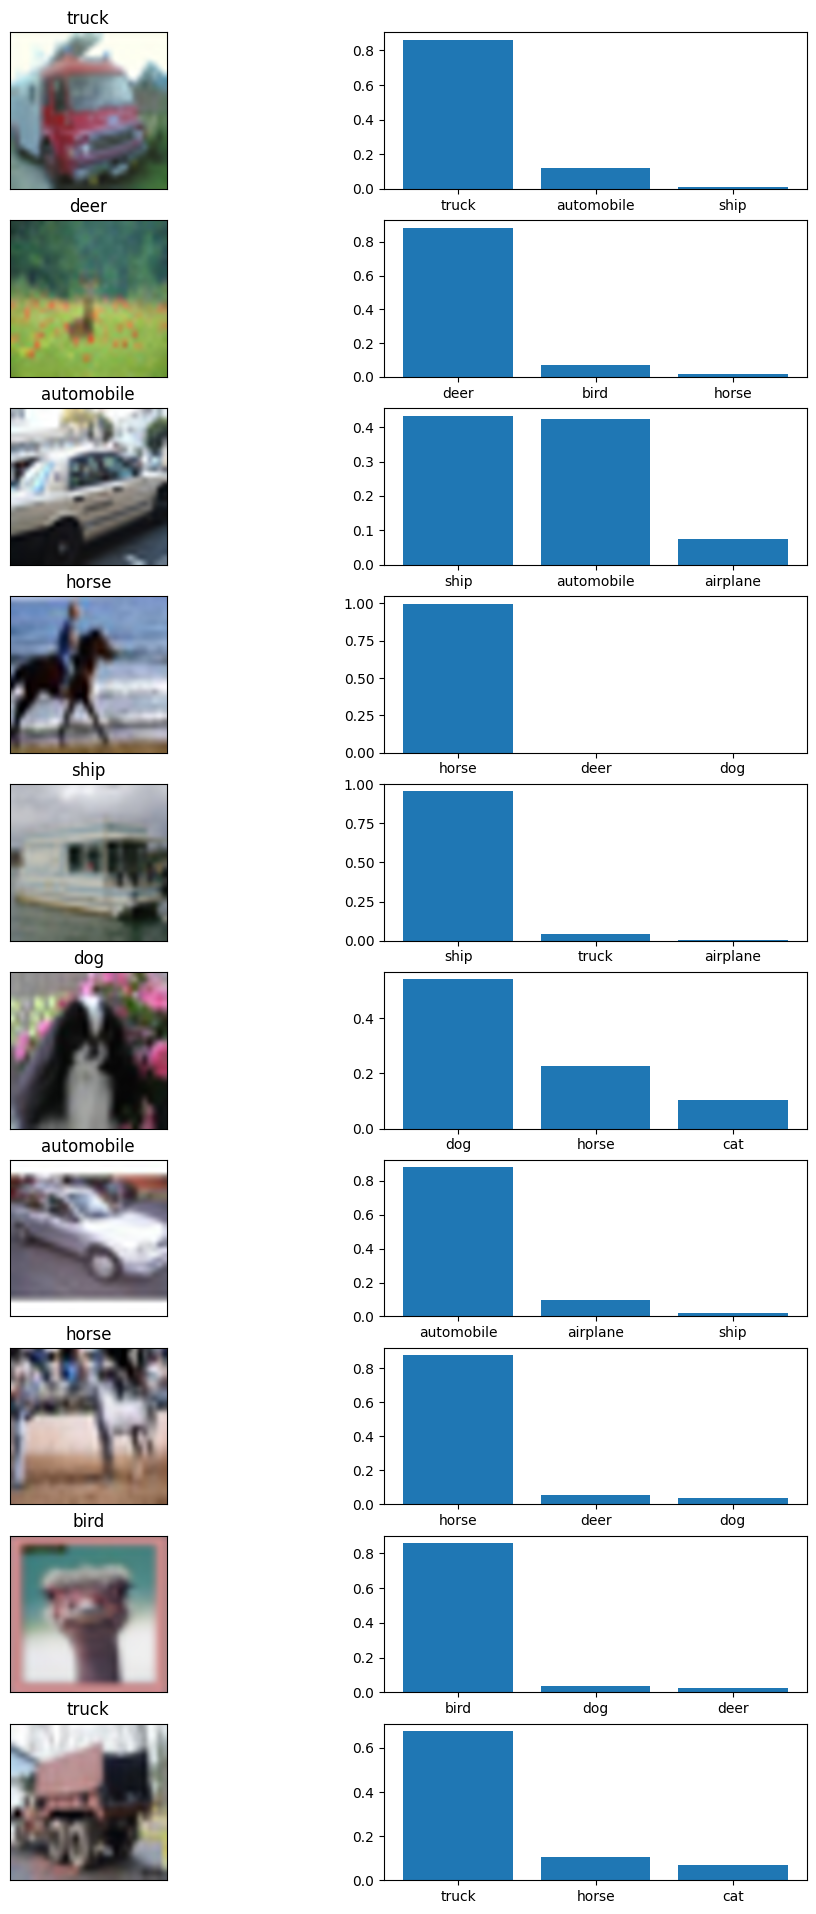

In [ ]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]

    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()